In [1]:
%pylab inline
from networkanalysis.networkanalysis import *
from networkanalysis.experiments import *
import networkanalysis
networkanalysis.__version__

Populating the interactive namespace from numpy and matplotlib


'0+unknown'

In [2]:
import seaborn as sbn

In [3]:
pG = PerturbationGraph()

In [4]:
pG.populate_pert_graph('summary_mbar.csv')

In [5]:
graph = pG.graph

In [6]:
print (np.sort(graph.nodes()))

['2' '3' '4' '5' '6' '7']


In [7]:
pG.compute_weighted_avg_paths('3')

In [8]:
ordered_keys = ['2', '3','4', '5', '6', '7']

In [9]:
pG.format_free_energies(merge_BM=True,intermed_ID='INT', compound_order=ordered_keys)

In [10]:
stage2_DDG = pG.freeEnergyInKcal

In [11]:
stage2_DDG

[{'2': -1.6985690296874236, 'error': 0.17338772846422676},
 {'3': -0.0, 'error': 0.0},
 {'4': 0.85078299275408076, 'error': 0.17878894515762039},
 {'5': -0.98148513869263121, 'error': 0.12157588211467087},
 {'6': -1.8489326198027158, 'error': 0.094127116084875742},
 {'7': -1.3365881103234416, 'error': 0.18602583237613082}]

In [12]:
experiments = ExperimentalData()

In [13]:
experiments.compute_DDG_from_IC50s('IC_50s.csv','3')

In [14]:
exp_list = experiments.freeEnergiesInKcal

In [15]:
print exp_list

[{'2': -4.1181358836569837, 'error': 0.41322747573364904}, {'3': 0.0, 'error': 0.41322747573364904}, {'4': -0.18761834473785186, 'error': 0.41322747573364904}, {'5': -1.0222963400933496, 'error': 0.41322747573364904}, {'error': 0.41322747573364904, '6': -2.9580596957266847}, {'7': -4.4226703158368341, 'error': 0.41322747573364904}]


In [16]:
pG.write_free_energies(stage2_DDG,'DDG.csv')
pG.write_free_energies(exp_list,'DDG_exp.csv')

## Statistics

In [17]:
from networkanalysis.stats import *

In [18]:
stats = freeEnergyStats()
stats.generate_statistics(stage2_DDG, exp_list, repeats=10000)

In [19]:
print "Experimental versus calculated statistics"
print "R : %.2f < %.2f < %.2f" %(stats.R_error[0],stats.R,stats.R_error[1])
print "MUE: %.2f < %.2f < %.2f" %(stats.mue_error[0],stats.mue,stats.mue_error[1])
print "R^2: %.2f < %.2f < %.2f" %(stats.R2_error[0],stats.R2,stats.R2_error[1])

Experimental versus calculated statistics
R : 0.80 < 0.82 < 0.84
MUE: 1.27 < 1.29 < 1.32
R^2: 0.65 < 0.67 < 0.70


In [20]:
stats = freeEnergyStats()
stats.generate_statistics(stage2_DDG, stage2_DDG, repeats=10000)

In [21]:
print "Calculated versus calculated statistics"
print "R : %.2f < %.2f < %.2f" %(stats.R_error[0],stats.R,stats.R_error[1])
print "MUE: %.2f < %.2f < %.2f" %(stats.mue_error[0],stats.mue,stats.mue_error[1])
print "R^2: %.2f < %.2f < %.2f" %(stats.R2_error[0],stats.R2,stats.R2_error[1])

Calculated versus calculated statistics
R : 0.99 < 0.99 < 1.00
MUE: 0.08 < 0.10 < 0.11
R^2: 0.98 < 0.99 < 0.99


In [22]:
stats = freeEnergyStats()
stats.generate_statistics(exp_list, exp_list, repeats=10000)

In [23]:
print "Experimental versus experimental statistics"
print "R : %.2f < %.2f < %.2f" %(stats.R_error[0],stats.R,stats.R_error[1])
print "MUE: %.2f < %.2f < %.2f" %(stats.mue_error[0],stats.mue,stats.mue_error[1])
print "R^2: %.2f < %.2f < %.2f" %(stats.R2_error[0],stats.R2,stats.R2_error[1])

Experimental versus experimental statistics
R : 0.98 < 0.98 < 0.99
MUE: 0.28 < 0.33 < 0.37
R^2: 0.96 < 0.97 < 0.98


## Plotting

In [24]:
stats = freeEnergyStats()
stats.generate_statistics(stage2_DDG, exp_list, repeats=10000)

In [25]:
from networkanalysis.plotting import *

In [26]:
plot = FreeEnergyPlotter(exp_list,stage2_DDG,compound_list=ordered_keys)

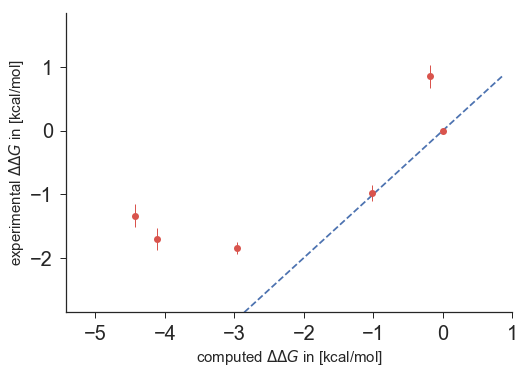

In [27]:
plot.plot_scatter_plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x112fa7250>,
 <matplotlib.figure.Figure at 0x1052897d0>)

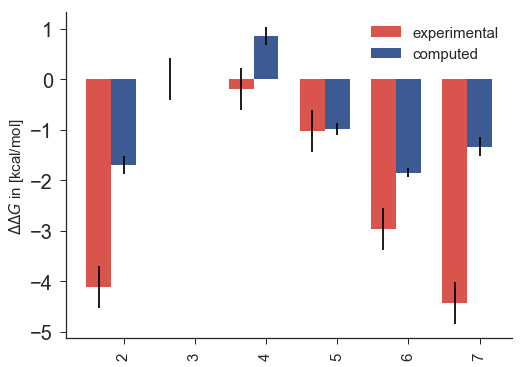

In [28]:
plot.plot_bar_plot()

In [29]:
scipy.stats.linregress(stats.data_exp,np.array(stats.data_comp)[:,0])

LinregressResult(slope=0.4424587254970892, intercept=0.10138649205328409, rvalue=0.82521610003422341, pvalue=0.043154344872691347, stderr=0.15141989270867889)

## Perturbation of experimental and computed results

In [30]:
def generate_perturbation(exp_ddg):
    new_exp_dic = []
    for dic in exp_ddg:
        keys = dic.keys()
        if keys[0]=='error':
            err = dic[keys[0]]
            val = dic[keys[1]]
            compound = keys[1]
        else:
            err = dic[keys[1]]
            val = dic[keys[0]]
            compound = keys[0]
        if err !=0.0:
            new_val = np.random.normal(val, err)
        else:
            new_val = val
        new_exp_dic.append({'error':err, compound : new_val})
    return new_exp_dic

In [31]:
def bootstrap_compounds(c_list, exp_data, sim_data):
    R = []
    mue = []
    rmsd = []
    for x in range(1000):
        indeces = np.random.randint(len(c_list), size=len(c_list))
        new_exp_list = []
        new_comp_list  = []
        for i in indeces:
            new_exp_list.append(exp_data[i])
            new_comp_list.append(sim_data[i])

        #exp_data = generate_new_exp_data(exp_data)
        new_exp_list = convert_to_array(new_exp_list)
        new_comp_list = convert_to_array(new_comp_list)
        R.append(scipy.stats.pearsonr(new_exp_list[:,0],new_comp_list[:,0])[0])
        rmsd.append(compute_rmsd(new_comp_list[:,0],new_exp_list[:,0]))
        #mue.append(calculate_mue(new_exp_list,new_comp_list[:,0]))
    return R, mue, rmsd

In [32]:
def convert_to_array(dic_list):
    new_list = []
    for item in dic_list:
        keys = item.keys()
        if keys[0] == 'error':
            new_list.append(np.array([item[keys[1]], item[keys[0]]]))
        else:
            new_list.append(np.array([item[keys[0]], item[keys[1]]]))
    return np.array(new_list)

In [33]:
def compute_rmsd(estimate, value):
    deviation = sqrt(np.sum((estimate - value)**2)/len(perturb_exp_ddg))
    return deviation

In [ ]:
mean_R = []
std_R = []
mean_mue = []
std_mue = []
mean_rmsd = []
std_rmsd = []
for i in xrange(1000):
    perturb_exp_ddg = generate_perturbation(exp_list)
    R, mue, rmsd = bootstrap_compounds(ordered_keys, exp_list, perturb_exp_ddg)
    mean_R.append(mean(R))
    std_R.append(std(R))
    std_mue.append(std(mue))
    mean_mue.append(mean(mue))
    std_rmsd.append(std(rmsd))
    mean_rmsd.append(mean(rmsd))

/Users/admin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/admin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/admin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/admin/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/admin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/admin/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [ ]:
print "R is: %f ± %f " %( np.mean(mean_R), np.std(std_R))
print "rmsd is: %f ± %f " %( np.mean(mean_rmsd), np.std(std_rmsd))